<a href="https://colab.research.google.com/github/Jyothishannu/Jyothishannu/blob/main/Traffic_Volume_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore the harmless warnings
import warnings
warnings.filterwarnings('ignore')

#set to display all cols in dataset
pd.set_option('display.max_columns',None)

In [ ]:
# Load the pro dataset

trafficdata = pd.read_csv("/content/traffic_volume_dataset.csv",header=0)
# Copy to back-uo file

trafficdata1=trafficdata.copy()

# Display first 5 records

trafficdata.head(5)

,Temperature,Weather_Condition,Time_of_Day,Day_of_Week,Traffic_Volume
0,25.618102,Clear,Evening,Wednesday,356.181018
1,31.695365,Clear,Evening,Tuesday,416.953650
2,22.339918,Snow,Evening,Friday,323.399178
3,29.016725,Snow,Afternoon,Friday,390.167252
4,34.548648,Rain,Afternoon,Tuesday,495.486478


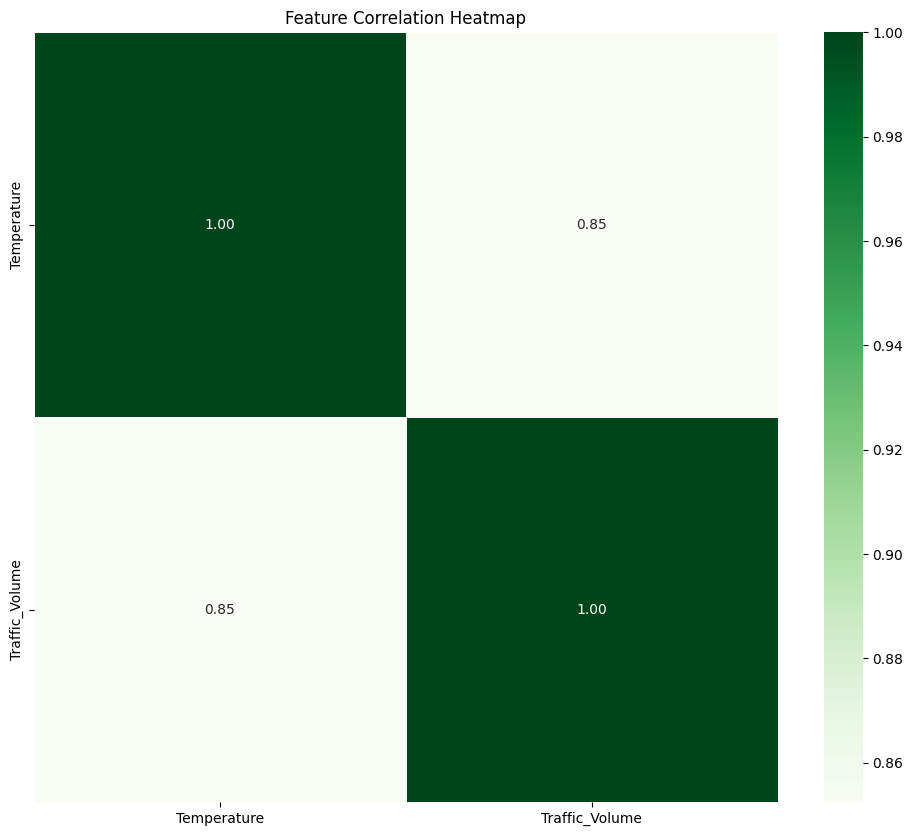

In [ ]:
# Compute the correlation matrix
correlation_matrix = trafficdata1.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
trafficdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        500 non-null    float64
 1   Weather_Condition  500 non-null    int64  
 2   Time_of_Day        500 non-null    int64  
 3   Day_of_Week        500 non-null    int64  
 4   Traffic_Volume     500 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [ ]:
trafficdata1.shape

(500, 5)

In [ ]:
trafficdata1.dtypes

Temperature          float64
Weather_Condition      int64
Time_of_Day            int64
Day_of_Week            int64
Traffic_Volume       float64
dtype: object

In [ ]:
trafficdata1.isnull().sum()

Temperature          0
Weather_Condition    0
Time_of_Day          0
Day_of_Week          0
Traffic_Volume       0
dtype: int64

In [ ]:
# using LabelEncoder to tranform object type to int
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
cols=['Weather_Condition', 'Time_of_Day','Day_of_Week']
for col in cols:
  trafficdata1[col]=le.fit_transform(trafficdata1[col])

In [ ]:
trafficdata1.head(5)


,Temperature,Weather_Condition,Time_of_Day,Day_of_Week,Traffic_Volume
0,25.618102,0,1,6,356.181018
1,31.695365,0,1,5,416.953650
2,22.339918,2,1,0,323.399178
3,29.016725,2,0,0,390.167252
4,34.548648,1,0,5,495.486478


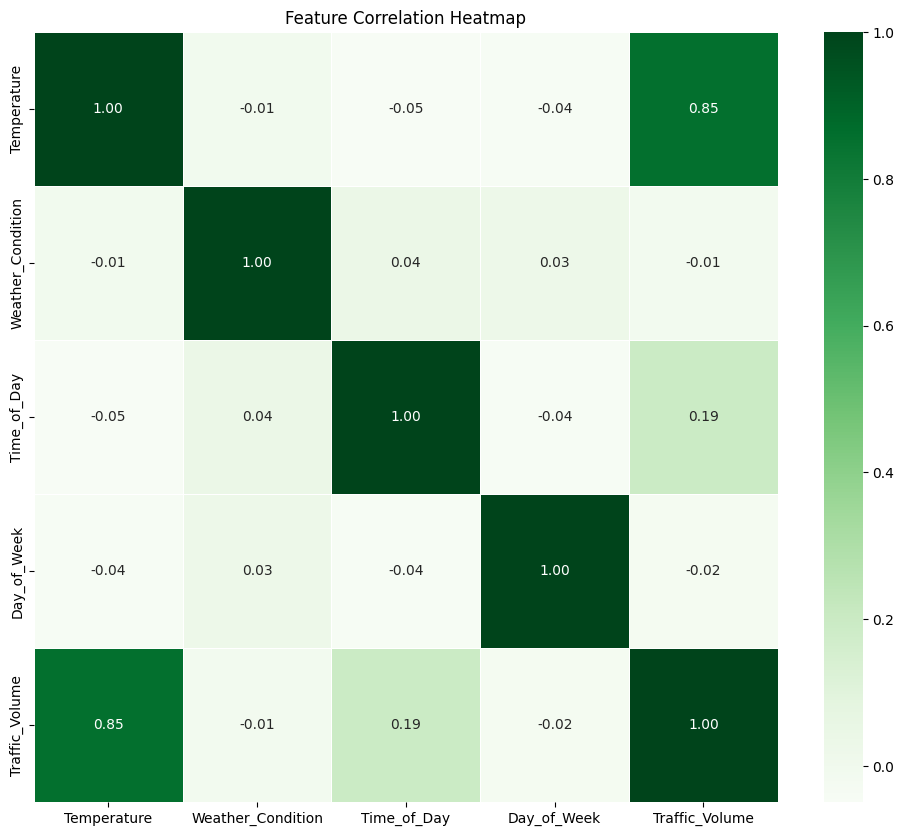

In [ ]:
# Compute the correlation matrix
correlation_matrix = trafficdata1.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
features=list()
for col in trafficdata1.columns:
  if col!='Traffic_Volume':
    features.append(col)
target='Traffic_Volume'

X=trafficdata1[features]
y=trafficdata1[target]

In [ ]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

# Display size of train and test sets
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 4), (100, 4), (400,), (100,))

In [ ]:
# Scaling the features using mimmax scaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

x_train=sc.fit_transform(x_train)

x_test=sc.fit_transform(x_test)


In [ ]:

# Build the regression models and compare the results
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


ModelLR = LinearRegression()
ModelDC = DecisionTreeRegressor()
ModelRF = RandomForestRegressor(n_estimators = 100, random_state = 0)

MM = [ModelLR, ModelDC, ModelRF]

for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)
    # Prediction the model with test dataset

    y_pred = models.predict(x_test)
    new_obs=[[35.45,0,1,2]]
    print("new observation results")
    print(models.predict(new_obs))


    # Print the model name

    print('\nModel Name: ', models)

    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error


    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred


    print("\nEvaluation of model: \n")
    #mae
    mae=mean_absolute_error(actual,predicted)
    print("Mean Absolute Error: ",mae)

    #rmse
    rmse=np.sqrt(mean_squared_error(actual,predicted))
    print("Root mean squared error: ",rmse)

    #r2score
    r2=r2_score(actual,predicted)
    accuracy = models.score(x_test, y_test)
    print("Accuracy (R-squared): ", accuracy)
    print("R2 score: ",r2)
    print("\n<============================================>")

new observation results
[5913.49844275]

Model Name:  LinearRegression()

Evaluation of model: 

Mean Absolute Error:  22.404238844444816
Root mean squared error:  24.893926204374125
Accuracy (R-squared):  0.7385552575966651
R2 score:  0.7385552575966651

<============================================>
new observation results
[476.33119735]

Model Name:  DecisionTreeRegressor()

Evaluation of model: 

Mean Absolute Error:  2.3296713817020485
Root mean squared error:  3.105566367619532
Accuracy (R-squared):  0.9959311212656283
R2 score:  0.9959311212656283

<============================================>
new observation results
[472.44995567]

Model Name:  RandomForestRegressor(random_state=0)

Evaluation of model: 

Mean Absolute Error:  2.712131669574337
Root mean squared error:  3.619274119697197
Accuracy (R-squared):  0.9944736794561041
R2 score:  0.9944736794561041

<============================================>


array([5913.49844275])

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy of the model: ",accuracy_score(y_test,y_pred))

ValueError: ignored